In [1]:
import shapely.geometry as sh
import xarray as xr
import numpy as np

In [2]:
import json 
import geojson

## Initial file used to generate the subsequent .json files

In [3]:
with open("../../GeoData/ZonesSympo/zones_sympo_4326.json","r") as fp: 
    poly_geo = json.load(fp)

## A. Create one json file that includes all individual zones sympo of one department

In [4]:
dpt_nb=["41"]  #["34","41","29","38"]

# list of the zones sympo id in the json file (zones_sympo_4326.json)
zs_json=[poly_geo["features"][i]["properties"]["id"] for i in range(len(poly_geo["features"]))]

# init
feature = []

for idpt, dpt in enumerate(dpt_nb):
        
    if idpt==0: # condition useful for the testing phase
        fname_mask = '../../GeoData/zones_sympo_multiples/'+dpt+'_mask_zones_sympos.nc'
        da_mask = xr.open_dataarray(fname_mask)  
        # zone sympo list in .nc format (hence the name: zsl_nc)
        zsl_nc=da_mask.id.values.tolist()
                
        for izs,zs_nc in enumerate(zsl_nc):
            if zs_nc != "departement":
                zs_val=zs_nc.split('+')
                
                if len(zs_val)==1:
                    # find the corresponding zone sympo index in the original .json file
                    id_json=zs_json.index(zs_val[0])
                    shape = sh.asShape(poly_geo["features"][id_json]["geometry"])

                    # append to feature its shape and id
                    feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_val[0]}))
                        
    # save feature in a .json data file
    data = geojson.FeatureCollection(feature) 
    with open("../../GeoData/ZonesSympo/zones_sympo_"+str(dpt)+".json","w") as f:
        geojson.dump(data,f)

In [4]:
# check the content of the file that was just created
with open("../../GeoData/ZonesSympo/zones_sympo_41.json","r") as fp: 
    geo = json.load(fp)
#geo

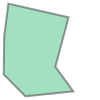

In [8]:
## draft (exemple of the union of two zones)
shape0 = sh.asShape(poly_geo["features"][0]["geometry"])
shape1 = sh.asShape(poly_geo["features"][1]["geometry"])
shape2= sh.asShape(poly_geo["features"][2]["geometry"])
feature = []
feature.append(geojson.Feature(geometry=shape0.union(shape1).union(shape2),properties = {"id":"0_1_2"}))

shape = sh.asShape(feature[0]["geometry"])
shape

## Same idea but we create one .json file that includes all combinations of the individual zones sympo of one department (as proposed by Mary)

In [10]:
dpt_nb=["38"]#["34","41","29","38"]

# list of the zones sympo id in the json file (zones_sympo_4326.json)
zs_json=[poly_geo["features"][i]["properties"]["id"] for i in range(len(poly_geo["features"]))]

# init
feature = []

for idpt, dpt in enumerate(dpt_nb):
        
    if idpt==0: # condition useful for the testing phase
        fname_mask = '../../GeoData/zones_sympo_multiples/'+dpt+'_mask_zones_sympos.nc'
        da_mask = xr.open_dataarray(fname_mask)    
        # zone sympo list in .nc format (hence the name: zsl_nc)
        zsl_nc=da_mask.id.values.tolist()
                
        for izs,zs_nc in enumerate(zsl_nc):
            if izs >-1: # tthis condition is always true. In the test we used this one: izs < 10:
                # construct the departement from all individual zones sympo
                if zs_nc == "departement":
                    individual_zs=[zs for zs in da_mask.id.values.tolist()[1:] if "+" not in zs]
                    #print(individual_zs) # check that all individual zones are considered
                    for j,zs in enumerate(individual_zs):
                        if j==0: # init shape
                            id_json=zs_json.index(zs)
                            shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                        else:
                            id_json=zs_json.index(zs)
                            shape=shape.union(sh.asShape(poly_geo["features"][id_json]["geometry"]))
                    feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_nc}))
                                
                # construct all other zones
                else:                
                    zs_val=zs_nc.split('+')

                    # construct individual zones
                    if len(zs_val)==1:
                        id_json=zs_json.index(zs_val[0])
                        shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                        feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_val[0]}))

                    # construct combined zones
                    else:
                        for j,zs in enumerate(zs_val):
                            if j==0: # init shape
                                id_json=zs_json.index(zs)
                                shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                            else: 
                                id_json=zs_json.index(zs)
                                shape=shape.union(sh.asShape(poly_geo["features"][id_json]["geometry"]))
                        feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_nc}))
                                                
    # save feature in a .json data file
    data = geojson.FeatureCollection(feature) 
    with open("../../GeoData/ZonesSympo/zones_sympo_combined_"+str(dpt)+".json","w") as f:
        geojson.dump(data,f)

In [12]:
# check the content of the file that was just created
with open("../../GeoData/ZonesSympo/zones_sympo_combined_38.json","r") as fp: 
    geo = json.load(fp)
geo

## Some examples of zones in the new .json file

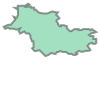

In [88]:
shape=sh.asShape(geo["features"][0]["geometry"])
shape

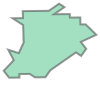

In [77]:
shape=sh.asShape(geo["features"][1]["geometry"])
shape

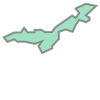

In [78]:
shape=sh.asShape(geo["features"][2]["geometry"])
shape

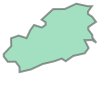

In [79]:
shape=sh.asShape(geo["features"][3]["geometry"])
shape

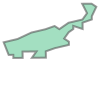

In [80]:
shape=sh.asShape(geo["features"][4]["geometry"])
shape

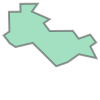

In [81]:
shape=sh.asShape(geo["features"][5]["geometry"])
shape

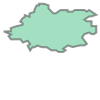

In [82]:
shape=sh.asShape(geo["features"][6]["geometry"])
shape

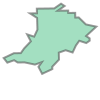

In [83]:
shape=sh.asShape(geo["features"][7]["geometry"])
shape

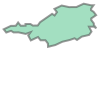

In [84]:
shape=sh.asShape(geo["features"][8]["geometry"])
shape

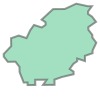

In [85]:
shape=sh.asShape(geo["features"][9]["geometry"])
shape